In [55]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

# Amazon Products EDA

Dataset: https://www.kaggle.com/datasets/nguyenngocphung/10000-amazon-products-dataset <br>
License: CC0 1.0 Public Domain Dedication <br>
This license permits all users of the dataset to freely copy, modify, and distribute their work, even for commercial purposes. There are also no liabilties to the owner of the dataset. <br>
The dataset consists of 10,004 rows and 14 columns and its file size is 29mb. <br>


### Import Required Libraries

In [1]:
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

### Load and Preprocess Dataset

In [2]:
products = pd.read_csv('Amazon_Products.csv', low_memory = False)
products = products.iloc[:,:14]
products

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN
10000,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN
10001,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,NaN
10002,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,NaN


### Exploring Datatypes and Missing values for each column

In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   uniq_id                                      10002 non-null  object
 1   product_name                                 10002 non-null  object
 2   manufacturer                                 9995 non-null   object
 3   price                                        8567 non-null   object
 4   number_available_in_stock                    7502 non-null   object
 5   number_of_reviews                            9984 non-null   object
 6   number_of_answered_questions                 9237 non-null   object
 7   average_review_rating                        9984 non-null   object
 8   amazon_category_and_sub_category             9312 non-null   object
 9   description                                  9351 non-null   object
 10  product_in

In [4]:
products['price'] = products['price'].astype(str)

In [5]:
# for price in products['price']:
#     print(price)
# #     if '-' in price:
# #         print(price.split('-')[0])
        

### Function to Clean Price Values

In [6]:
def clean_price(value):
    if '£' in value:
        value = value.replace('£',"")
        if '-' in value:
            value = value.split('-')[0]
        if ',' in value:
            value = value.replace(',',"")
        return float(value)
    
    elif value == 'nan':
        value= value.replace('nan','0')
        return float(value)     


In [7]:
products['price'] = products['price'].apply(lambda x: clean_price(x))

In [8]:
# products['price'] = products['price'].astype(float)

In [9]:
# products['price'] = products['price'].replace('[\,£]','', regex=True).astype(float)
# products

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10002 non-null  object 
 1   product_name                                 10002 non-null  object 
 2   manufacturer                                 9995 non-null   object 
 3   price                                        10002 non-null  float64
 4   number_available_in_stock                    7502 non-null   object 
 5   number_of_reviews                            9984 non-null   object 
 6   number_of_answered_questions                 9237 non-null   object 
 7   average_review_rating                        9984 non-null   object 
 8   amazon_category_and_sub_category             9312 non-null   object 
 9   description                                  9351 non-null   object 
 10

In [11]:
top5 = products.nlargest(n=5, columns=['price'])
top5

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
7098,75d96583894e50412ba5c0161375fef5,Bowen Designs - Marvel Statue Thor Classic Act...,Bowen Designs,2439.92,2 new,1,1,4.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Access...,Sideshow Collectibles is proud to present the ...,Technical Details Item Weight6 Kg Product Dime...,Sideshow Collectibles is proud to present the ...,NaN,NaN
2232,4f705c302bdcf5d2b0c1df973d98f99f,DJI Phantom 2 with H3-3D Gimbal,DJI,995.11,2 used,4,19,5.0 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,Product Description Including the H3-3D Gimbal...,Technical Details Item Weight2.5 Kg Product Di...,Product Description Including the H3-3D Gimbal...,NaN,Does this come with the gimbal already install...
9180,1e897bf37e4e89aba7cc962f24913fd4,Indiana Jones - 12 Inch Action Figures: Indian...,Sideshow,719.95,2 new,1,1,5.0 out of 5 stars,Figures & Playsets > Science Fiction & Fantasy,Figurine articulée taille env. 30 cm avec vête...,Technical Details Item Weight1.1 Kg Product Di...,Figurine articulée taille env. 30 cm avec vête...,NaN,NaN
7683,a33386fa5647eeff2c8d6ca990ecf4f6,Autoart 70206 - Aston Martin V12 Vantage - 201...,AUTOart,648.95,NaN,1,1,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,AUTOART ASTON MARTIN V12 VANTAGE 2010 SILVER W...,Technical Details Item Weight50 g Product Dime...,AUTOART ASTON MARTIN V12 VANTAGE 2010 SILVER W...,http://www.amazon.co.uk/Aston-Martin-Vantage-s...,NaN
5667,15d8de76320e3105a3d2e482670d08b6,Weiss Schwarz Extra Booster Clannad Vol.3,Bushiroad,629.95,NaN,1,2,5.0 out of 5 stars,Hobbies > Trading Cards & Accessories > Packs ...,Weiss Schwarz Extra Booster CLANNAD vol.03 BOX,Technical Details Item Weight104 g Product Dim...,Weiss Schwarz Extra Booster CLANNAD vol.03 BOX,NaN,NaN


In [12]:
# @ipywidgets.interact(Top_N = [5,10,15])
# def get_costliest_products(Top_N):
#     topn = products.nlargest(n= Top_N, columns=['price'])  

#     plt.figure(figsize=(10,8))

#     plt.bar(topn['product_name'], topn['price'], align='center', alpha=0.5)
#     #plt.ylim([0,0])
#     plt.ylabel('Price')
#     plt.xticks(rotation=90)
#     plt.title('Top ' + str(Top_N) + ' costliest products on Amazon')
#     plt.show()

### Visualization #1

In [13]:
def get_costliest_products(Top_N):
    topn = products.nlargest(n= Top_N, columns=['price'])  

    plt.figure(figsize=(10,8))

    plt.bar(topn['product_name'], topn['price'], align='center', alpha=0.5)
    #plt.ylim([0,0])
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.title('Top ' + str(Top_N) + ' costliest products on Amazon')
    plt.show()

In [14]:
topn_drop = ipywidgets.Dropdown(options= [5,10,15], value = 5)
topn_drop

Dropdown(options=(5, 10, 15), value=5)

In [15]:
out = ipywidgets.interactive_output(get_costliest_products, {'Top_N': topn_drop})
out

Output()

In [16]:
mySelectedLabel = ipywidgets.Label("Select Top N Products")

In [17]:
ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([topn_drop]), out])

### Visualization #2

In [18]:
products['average_review_rating'] = products['average_review_rating'].astype(str)

In [19]:
def clean_rating(value):
    if 'out' in value:
        value = value.split('out')[0]
        return float(value)
    
    elif value == 'nan':
        value= value.replace('nan','0')
        return float(value)

In [20]:
products['average_review_rating'] = products['average_review_rating'].apply(lambda x: clean_rating(x))

In [21]:
products['average_review_rating'].value_counts()

5.0    5140
4.0    1312
4.5     718
4.8     567
4.7     528
4.3     407
4.6     392
4.4     298
4.9     237
4.2     217
4.1     145
0.0      20
3.9       7
3.0       3
3.6       3
3.5       2
3.3       2
3.7       2
3.8       1
2.3       1
Name: average_review_rating, dtype: int64

In [22]:
# @ipywidgets.interact(manufacturer = products['manufacturer'].unique())
# def get_review_counts(manufacturer):
    
#     manufacturer_subset = products.loc[products['manufacturer'] == manufacturer]

#     plt.figure(figsize=(10,8))

#     plt.hist(manufacturer_subset['average_review_rating'])
#     #plt.ylim([0,0])
#     plt.ylabel('Count')
#     #plt.xticks(rotation=90)
#     #plt.title('Top ' + str(Top_N) + ' costliest products on Amazon')
#     plt.show()


In [23]:
def get_review_counts(manufacturer):
    
    manufacturer_subset = products.loc[products['manufacturer'] == manufacturer]

    plt.figure(figsize=(10,8))

    plt.hist(manufacturer_subset['average_review_rating'])
    #plt.ylim([0,0])
    plt.ylabel('Count')
    #plt.xticks(rotation=90)
    #plt.title('Top ' + str(Top_N) + ' costliest products on Amazon')
    plt.show()

In [24]:
manu_drop = ipywidgets.Dropdown(options= products['manufacturer'].unique(), value = 'Hornby')
manu_drop

Dropdown(options=('Hornby', 'FunkyBuys', 'ccf', 'Generic', 'Chuggington', 'Kato (USA)', 'Bachmann', 'Kato', 'P…

In [25]:
out2 = ipywidgets.interactive_output(get_review_counts, {'manufacturer': manu_drop})
out2

Output()

In [26]:
mySelectedLabel1 = ipywidgets.Label("Select Top N Products")

In [27]:
comp1 = ipywidgets.VBox([mySelectedLabel1, ipywidgets.HBox([topn_drop]), out])
comp1

In [28]:
mySelectedLabel2 = ipywidgets.Label("Review Counts Per Manufacturer")

In [29]:
comp2 = ipywidgets.VBox([mySelectedLabel2, ipywidgets.HBox([manu_drop]), out2])
comp2

In [30]:
mySelectedLabel3 = ipywidgets.Label("AMAZON PRODUCTS DASHBOARD")

In [31]:
dashboard = ipywidgets.VBox([mySelectedLabel3, ipywidgets.HBox([comp1, comp2])])
dashboard

In [51]:
# VC= products['amazon_category_and_sub_category'].value_counts()
# VC1 = VC.to_frame()
# # VC1=VC.unique()
# VC1 = VC1.reset_index()
# VC1 = VC1.rename(columns = {'index': 'Categories', 'amazon_category_and_sub_category': 'Count'})
# VC1


## Visualization 3

In [48]:
def get_category_counts(manufacturer):
    
    manufacturer_subset = products.loc[products['manufacturer'] == manufacturer]
    v1 = manufacturer_subset['amazon_category_and_sub_category'].value_counts()
    v1 = pd.DataFrame(v1)
    
    #topn = manufacturer_subset.nlargest(n= 5, columns= ['amazon_category_and_sub_category'] )  

    plt.figure(figsize=(10,8))
    
    y= v1.amazon_category_and_sub_category
    
    mylabels = v1.index

   # plt.pie(manufacturer_subset['amazon_category_and_sub_category'])
    
    plt.pie(y, labels = mylabels, autopct = '%.0f%%')
    #plt.ylim([0,0])
    #plt.xticks(rotation=90)
    #plt.title('Top ' + str(Top_N) + ' costliest products on Amazon')
    plt.show()

In [49]:
out3 = ipywidgets.interactive_output(get_category_counts, {'manufacturer': manu_drop})
# out3.clear_output()
out3

Output()

In [44]:
mySelectedLabel2 = ipywidgets.Label("Select Top 5 Products sold by a Manufacturer")

In [50]:
comp3 = ipywidgets.VBox([mySelectedLabel2, ipywidgets.HBox([manu_drop]), out3])
comp3

In [53]:
dashboard = ipywidgets.VBox([mySelectedLabel3, ipywidgets.HBox([comp1, comp2])])
dashboard = ipywidgets.VBox([dashboard,comp3])
dashboard

# Contextual Visualization # 1

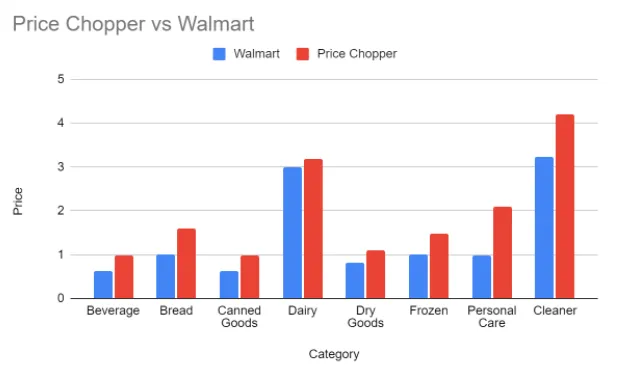

# Contextual Visualization # 2

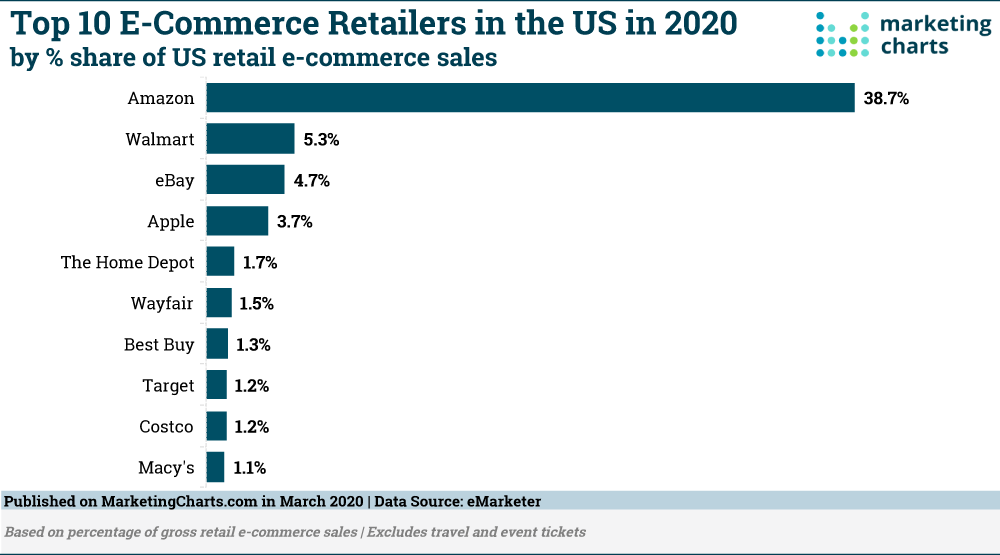

# Writeup - Part 1:

Things that did and did not work : <br>

1) The dataset is not "clean" and requires some preprocessing to it. While loading the dataset as is, there were about 900 columns which mostly consist of NaN values. Only the first 14 columns are significant and relevant to us. <br>

2) When we do the info() method for the dataframe, we see the columns with null values and the datatype of the columns. Most columns are mixed datatypes and will require further processing. <br>

3) I wanted to do an initial visualization to check the costliest items in this dataset. Though I was able to create this visualization, I noticed that the price values are in string format and hence this initial visualization is not accurate as it stands. <br>

4) In further parts of the project, I shall create preprocessing functions which shall clean the data appropriately and create accurate visualizations. <br>

# Writeup - Part 2:

<b>Dashboard usage: </b><br>

I have used matplotlib to generate my visualizations and ipywidgets to add interactivity and combine them together as a dashboard. <br>
<br>
My first visualization is a bar chart which gives us insights into the costliest products in this dataset.<br>
We can select from Top 5, 10, 15 costliest products from the drop down<br>
<br>
My second visualization is a histogram which allows us to see the distribution of Product Ratings of each Manufacturer.<br>
We can select a Manufacturer from the drop down<br>
<br>
<br>
<b>Contextual Datasets Identified:</b><br>
1) Walmart Products: <br>
https://data.world/promptcloud/walmart-product-listing-2020 <br>
This is a dataset from Walmart containing various products and their information. We can use this to compare various prices for products between walmart and amazon<br>
<br>
2) Additional Amazon Products: <br>
https://data.world/promptcloud/amazon-product-dataset-2020 <br>
This is another datset of Amazon products from USA which will give us insights of price difference in different regions<br>

        

In [54]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>